In [2]:
import pandas as pd

import functions.generate_graphs as gg
import functions.hyphotesis_tester as ht

## Load Data

In [16]:
FOLDER_PATH = "baseline"
TEST_TYPE = "Baseline"

# json
jGP = pd.read_csv(f"../{FOLDER_PATH}/json_get_plan_data_v2.csv")
jGSP = pd.read_csv(f"../{FOLDER_PATH}/json_get_specific_plan_data_v2.csv")

# protobuf
pGP = pd.read_csv(f"../{FOLDER_PATH}/protobuf_get_plan_data_v2.csv")
pGSP = pd.read_csv(f"../{FOLDER_PATH}/protobuf_get_specific_plan_data_v2.csv")

# protobuf v2
pGPv2 = pd.read_csv(f"../{FOLDER_PATH}/protobuf_get_plan_data_v3.csv")
pGSPv2 = pd.read_csv(f"../{FOLDER_PATH}/protobuf_get_specific_plan_data_v3.csv")

pSummary = pd.read_csv(f"../{FOLDER_PATH}/summary_get_protobuf.csv")
pJson = pd.read_csv(f"../{FOLDER_PATH}/summary_get_json.csv")
pSummaryV3 = pd.read_csv(f"../{FOLDER_PATH}/summary_get_protobuf_v3.csv")

pGSummary = pd.read_csv(f"../{FOLDER_PATH}/summary_post_protobuf.csv")
pGJson = pd.read_csv(f"../{FOLDER_PATH}/summary_post_json.csv")
pGSummaryV3 = pd.read_csv(f"../{FOLDER_PATH}/summary_post_protobuf_v3.csv")

## Generate Graphs

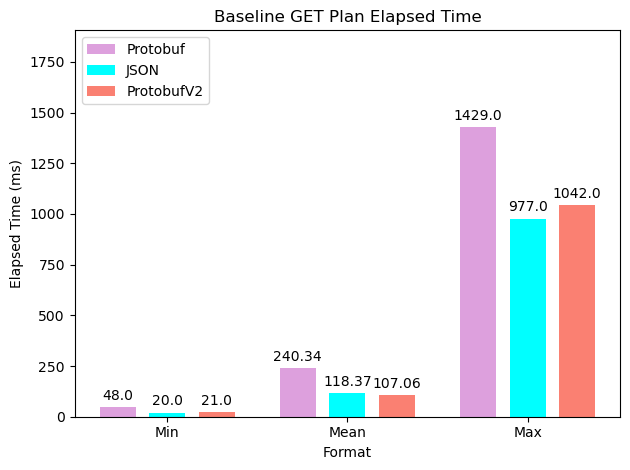

In [17]:
gg.create_min_max_mean_graph_v2(pGP,jGP,pGPv2, f"{TEST_TYPE} GET Plan Elapsed Time", "elapsed" ,"Elapsed Time (ms)", spacing=0.075)

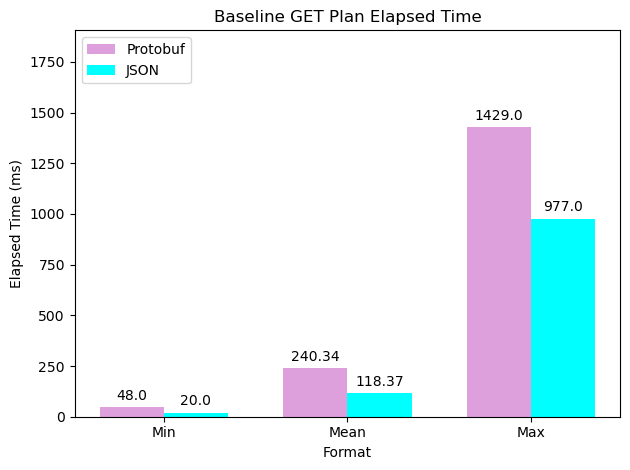

In [18]:
gg.create_min_max_mean_graph(pGP,jGP,f"{TEST_TYPE} GET Plan Elapsed Time", "elapsed" ,"Elapsed Time (ms)")

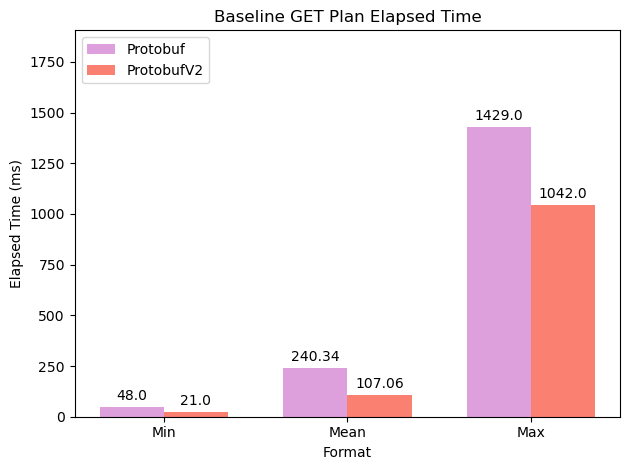

In [19]:
gg.create_min_max_mean_graph(pGP,pGPv2,f"{TEST_TYPE} GET Plan Elapsed Time", "elapsed" ,"Elapsed Time (ms)", labels=["Protobuf", "ProtobufV2"],colors=["plum","salmon"])

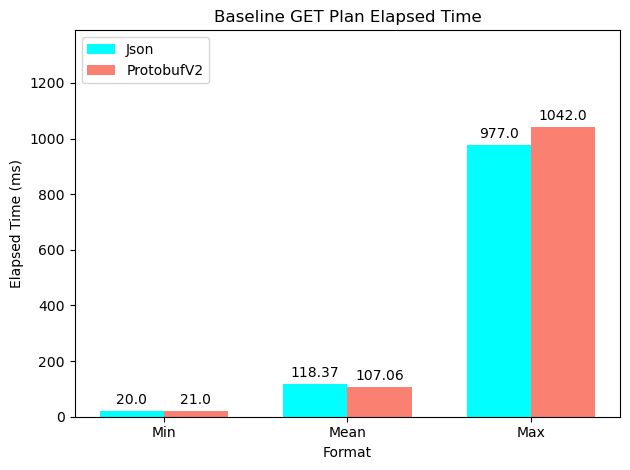

In [20]:
gg.create_min_max_mean_graph(jGP,pGPv2,f"{TEST_TYPE} GET Plan Elapsed Time", "elapsed" ,"Elapsed Time (ms)", labels=["Json", "ProtobufV2"],colors=["cyan","salmon"])

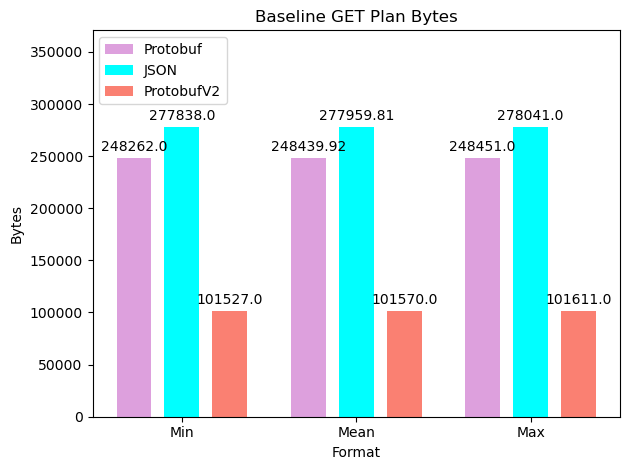

In [21]:
gg.create_min_max_mean_graph_v2(pGP,jGP,pGPv2, f"{TEST_TYPE} GET Plan Bytes", "bytes" ,"Bytes", spacing=0.075)

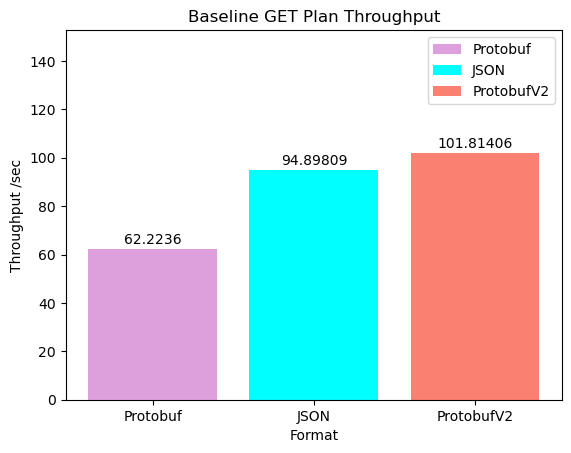

In [22]:
gg.create_one_pain_plot_v3(pSummary,pJson,pSummaryV3,0,f"{TEST_TYPE} GET Plan Throughput", "Throughput","Throughput /sec")

## Hypothesis Tests - Baseline GET Plan 

**Does the data obtained have a significant perfomance between them?**

In [27]:
ht.hyphtesis_test([pGSP['elapsed'],jGSP['elapsed']],"There is no significant difference between the performance of both versions", "There is a significant difference between the performance of both versions")


p_value - 1.1728499000847294e-71 < 0.5 - H0 is rejected, therefore 'There is a significant difference between the performance of both versions'.


1.1728499000847294e-71

**Is Protobuf faster than json?**

In [28]:
ht.hyphtesis_test([pGSP['elapsed'],jGSP['elapsed']],"Protobuf elapsed times are not significant smaller than JSON", "Protobuf elapsed times are significant smaller than JSON",'less')


p_value - 1.0 > 0.5 - H0 is not rejected, in other words 'Protobuf is not faster than JSON'.


1.0

**Is ProtobufV2 faster than json?**

In [29]:
ht.hyphtesis_test([pGSPv2['elapsed'],jGSP['elapsed']],"ProtobufV2 is not faster than JSON", "ProtobufV2 is faster than JSON",'less')


p_value - 2.464603729436772e-17 < 0.5 - H0 is rejected, therefore 'ProtobufV2 is faster than JSON'.


2.464603729436772e-17

**Does the ProtobufV2 payload take up fewer bytes?**

In [30]:
ht.hyphtesis_test([pGSPv2['bytes'],jGSP['bytes']],"ProtobufV2 does not result in fewer received bytes compared to JSON", "ProtobufV2 results in fewer received bytes compared to JSON",'less')


p_value - 0.0 < 0.5 - H0 is rejected, therefore 'ProtobufV2 results in fewer received bytes compared to JSON'.


0.0

# Graph PWP


In [41]:
FOLDER_PATH = "baseline"
TEST_TYPE = "Baseline"

# json
jGP_baseline= pd.read_csv(f"../{FOLDER_PATH}/json_get_plan_data_v2.csv")
jGSP_baseline = pd.read_csv(f"../{FOLDER_PATH}/json_get_specific_plan_data_v2.csv")

# protobuf
pGP_baseline = pd.read_csv(f"../{FOLDER_PATH}/protobuf_get_plan_data_v2.csv")
pGSP_baseline = pd.read_csv(f"../{FOLDER_PATH}/protobuf_get_specific_plan_data_v2.csv")

# protobuf v2
pGPv2_baseline = pd.read_csv(f"../{FOLDER_PATH}/protobuf_get_plan_data_v3.csv")
pGSPv2_baseline = pd.read_csv(f"../{FOLDER_PATH}/protobuf_get_specific_plan_data_v3.csv")

pSummary_baseline = pd.read_csv(f"../{FOLDER_PATH}/summary_get_protobuf.csv")
pJson_baseline = pd.read_csv(f"../{FOLDER_PATH}/summary_get_json.csv")
pSummaryV3_baseline = pd.read_csv(f"../{FOLDER_PATH}/summary_get_protobuf_v3.csv")

pGSummary_baseline = pd.read_csv(f"../{FOLDER_PATH}/summary_post_protobuf.csv")
pGJson_baseline = pd.read_csv(f"../{FOLDER_PATH}/summary_post_json.csv")
pGSummaryV3_baseline = pd.read_csv(f"../{FOLDER_PATH}/summary_post_protobuf_v3.csv")


FOLDER_PATH = "load"
TEST_TYPE = "Load"

# json
jGP_load = pd.read_csv(f"../{FOLDER_PATH}/json_get_plan_data_v2.csv")
jGSP_load  = pd.read_csv(f"../{FOLDER_PATH}/json_get_specific_plan_data_v2.csv")


# protobuf
pGP_load = pd.read_csv(f"../{FOLDER_PATH}/protobuf_get_plan_data_v2.csv")
pGSP_load  = pd.read_csv(f"../{FOLDER_PATH}/protobuf_get_specific_plan_data_v2.csv")


pGPv2_load  = pd.read_csv(f"../{FOLDER_PATH}/protobuf_get_plan_data_v3.csv")
pGSPv2_load  = pd.read_csv(f"../{FOLDER_PATH}/protobuf_get_specific_plan_data_v3.csv")


pSummary_load  = pd.read_csv(f"../{FOLDER_PATH}/summary_get_protobuf.csv")
pJson_load  = pd.read_csv(f"../{FOLDER_PATH}/summary_get_json.csv")
pSummaryV3_load  = pd.read_csv(f"../{FOLDER_PATH}/summary_get_protobuf_v3.csv")


FOLDER_PATH = "Stress"
TEST_TYPE = "Stress"

# json
jGP_stress = pd.read_csv(f"../{FOLDER_PATH}/json_get_plan_data_v2.csv")
jGSP_stress = pd.read_csv(f"../{FOLDER_PATH}/json_get_specific_plan_data_v2.csv")


# protobuf
pGP_stress = pd.read_csv(f"../{FOLDER_PATH}/protobuf_get_plan_data_v2.csv")
pGSP_stress = pd.read_csv(f"../{FOLDER_PATH}/protobuf_get_specific_plan_data_v2.csv")


pGPv2_stress = pd.read_csv(f"../{FOLDER_PATH}/protobuf_get_plan_data_v3.csv")
pGSPv2_stress = pd.read_csv(f"../{FOLDER_PATH}/protobuf_get_specific_plan_data_v3.csv")


pSummary_stress = pd.read_csv(f"../{FOLDER_PATH}/summary_get_protobuf.csv")
pJson_stress = pd.read_csv(f"../{FOLDER_PATH}/summary_get_json.csv")
pSummaryV3_stress = pd.read_csv(f"../{FOLDER_PATH}/summary_get_protobuf_v3.csv")


FOLDER_PATH = "resistance"
TEST_TYPE = "Soak"

# json
jGP_soak = pd.read_csv(f"../{FOLDER_PATH}/json_get_plan_data.csv")
jGSP_soak = pd.read_csv(f"../{FOLDER_PATH}/json_get_specific_plan_data.csv")
jGD_soak = pd.read_csv(f"../{FOLDER_PATH}/json_get_details.csv")
jP_soak = pd.read_csv(f"../{FOLDER_PATH}/json_login.csv")


# protobuf
pGP_soak = pd.read_csv(f"../{FOLDER_PATH}/protobuf_get_plan_data.csv")
pGSP_soak = pd.read_csv(f"../{FOLDER_PATH}/protobuf_get_specific_plan_data.csv")
pGD_soak = pd.read_csv(f"../{FOLDER_PATH}/protobuf_get_details.csv")
pP_soak = pd.read_csv(f"../{FOLDER_PATH}/protobuf_login.csv")

pGPv2_soak = pd.read_csv(f"../{FOLDER_PATH}/protobuf_get_plan_data_v3.csv")
pGSPv2_soak = pd.read_csv(f"../{FOLDER_PATH}/protobuf_get_specific_plan_data_v3.csv")
pGDv2_soak = pd.read_csv(f"../{FOLDER_PATH}/protobuf_get_details_v3.csv")
pPv2_soak = pd.read_csv(f"../{FOLDER_PATH}/protobuf_login_v3.csv")

pSummary_soak = pd.read_csv(f"../{FOLDER_PATH}/summary_protobuf.csv")
pJson_soak = pd.read_csv(f"../{FOLDER_PATH}/summary_json.csv")
pSummaryV3_soak = pd.read_csv(f"../{FOLDER_PATH}/summary_protobuf_v3.csv")

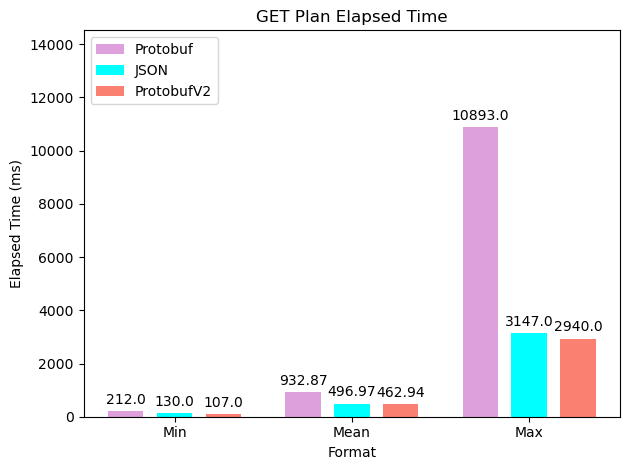

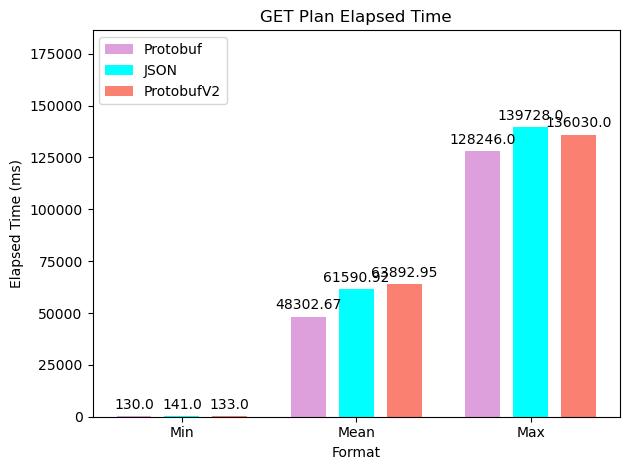

In [29]:
import matplotlib.pyplot as plt
import numpy as np
   

def create_min_max_mean_graph_v2(pGP, jGP, pGPv2, title, yLabel, xLabel="Format", labels=["Protobuf", "JSON", "ProtobufV2"], colors=["plum", "cyan", "salmon"], loc="upper left", spacing = 0.05, width  = 2):

    min_values = [pGP.min(), jGP.min(), pGPv2.min()]
    mean_values = [pGP.mean(), jGP.mean(), pGPv2.mean()]
    max_values = [pGP.max(), jGP.max(), pGPv2.max()]

    bar_labels = ['Min', 'Mean', 'Max']
    protobuf = [min_values[0], mean_values[0], max_values[0]]
    json = [min_values[1], mean_values[1], max_values[1]]
    protobufV2 = [min_values[2], mean_values[2], max_values[2]]

    x = np.arange(len(bar_labels))
    width = 0.2

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width - spacing, protobuf, width, label=labels[0], color=colors[0])
    rects2 = ax.bar(x, json, width, label=labels[1], color=colors[1])
    rects3 = ax.bar(x + width + spacing, protobufV2, width, label=labels[2], color=colors[2])

    ax.set_xlabel(xLabel)
    ax.set_ylabel(yLabel)
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(bar_labels)
    ax.legend(loc=loc)
    ax.set_ylim(0, max(max_values) + max(max_values) * (1/3))

    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(round(height, 2)),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom')

    autolabel(rects1)
    autolabel(rects2)
    autolabel(rects3)

    fig.tight_layout()

    plt.show()
    
    
valuesProto = pGP_baseline["elapsed"] + pGP_load["elapsed"] + pGP_stress["elapsed"] + pGP_soak["elapsed"]
valuesJSON =  jGP_baseline["elapsed"] + jGP_load["elapsed"] + jGP_stress["elapsed"] + jGP_soak["elapsed"]
valuesProtoV2 = pGPv2_baseline["elapsed"] + pGPv2_load["elapsed"] + pGPv2_stress["elapsed"] + pGPv2_soak["elapsed"]

create_min_max_mean_graph_v2(valuesProto,valuesJSON,valuesProtoV2, f"GET Plan Elapsed Time",yLabel="Elapsed Time (ms)", spacing=0.075)

valuesProto = pGSP_baseline["elapsed"] + pGSP_load["elapsed"] + pGSP_stress["elapsed"] + pGSP_soak["elapsed"]
valuesJSON =  jGSP_baseline["elapsed"] + jGSP_load["elapsed"] + jGSP_stress["elapsed"] + jGSP_soak["elapsed"]
valuesProtoV2 = pGSPv2_baseline["elapsed"] + pGSPv2_load["elapsed"] + pGSPv2_stress["elapsed"] + pGSPv2_soak["elapsed"]

create_min_max_mean_graph_v2(valuesProto,valuesJSON,valuesProtoV2, f"GET Plan Elapsed Time",yLabel="Elapsed Time (ms)", spacing=0.075)


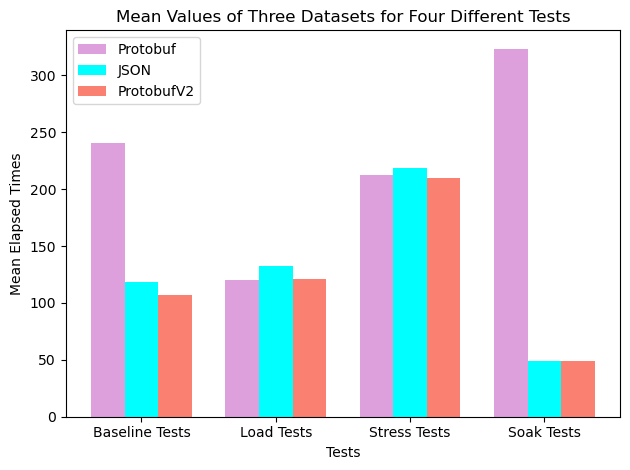

In [37]:
import matplotlib.pyplot as plt
import numpy as np

pGP_baseline["elapsed"] + pGP_load["elapsed"] + pGP_stress["elapsed"] + pGP_soak["elapsed"]
colors=["plum", "cyan", "salmon"]
# Example data
tests = ['Baseline Tests', 'Load Tests', 'Stress Tests', 'Soak Tests']
mean_values_1 = [pGP_baseline["elapsed"].mean(), pGP_load["elapsed"].mean(), pGP_stress["elapsed"].mean(), pGP_soak["elapsed"].mean()]
mean_values_2 = [jGP_baseline["elapsed"].mean(), jGP_load["elapsed"].mean(), jGP_stress["elapsed"].mean(), jGP_soak["elapsed"].mean()] 
mean_values_3 = [pGPv2_baseline["elapsed"].mean(), pGPv2_load["elapsed"].mean(), pGPv2_stress["elapsed"].mean(), pGPv2_soak["elapsed"].mean()] 

# Bar plot settings
bar_width = 0.25
index = np.arange(len(tests))

# Create clustered column chart
fig, ax = plt.subplots()

bar1 = ax.bar(index - bar_width, mean_values_1, bar_width, label='Protobuf', color=colors[0])
bar2 = ax.bar(index, mean_values_2, bar_width, label='JSON', color=colors[1])
bar3 = ax.bar(index + bar_width, mean_values_3, bar_width, label='ProtobufV2', color=colors[2])

# Add labels and title
ax.set_xlabel('Tests')
ax.set_ylabel('Mean Elapsed Times')
ax.set_title('Mean Values of Three Datasets for Four Different Tests')
ax.set_xticks(index)
ax.set_xticklabels(tests)
ax.legend()

plt.tight_layout()

# Show plot
plt.show()


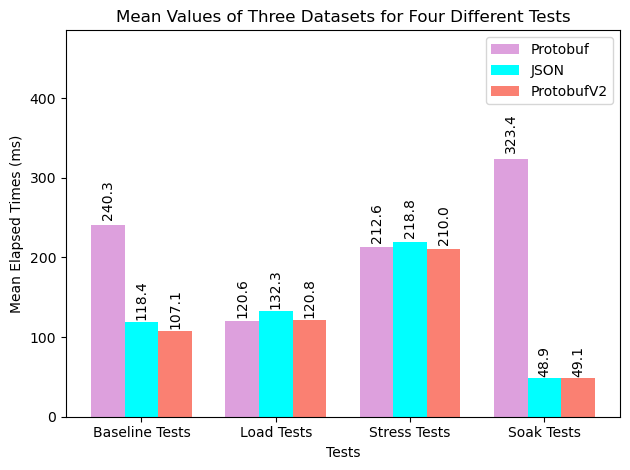

In [54]:
import matplotlib.pyplot as plt
import numpy as np


# Example data (calculating mean values)
mean_values_1 = [pGP_baseline["elapsed"].mean(), pGP_load["elapsed"].mean(), pGP_stress["elapsed"].mean(), pGP_soak["elapsed"].mean()]
mean_values_2 = [jGP_baseline["elapsed"].mean(), jGP_load["elapsed"].mean(), jGP_stress["elapsed"].mean(), jGP_soak["elapsed"].mean()]
mean_values_3 = [pGPv2_baseline["elapsed"].mean(), pGPv2_load["elapsed"].mean(), pGPv2_stress["elapsed"].mean(), pGPv2_soak["elapsed"].mean()]

# Bar plot settings
bar_width = 0.25
index = np.arange(len(tests))

# Create vertical bar plot
fig, ax = plt.subplots()

bar1 = ax.bar(index - bar_width, mean_values_1, bar_width, label='Protobuf', color='plum')
bar2 = ax.bar(index, mean_values_2, bar_width, label='JSON', color='cyan')
bar3 = ax.bar(index + bar_width, mean_values_3, bar_width, label='ProtobufV2', color='salmon')

# Add values vertically on top of bars
def add_values_on_top(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height + height*0.025, f'{height:.1f}', ha='center', va='bottom', rotation=90)

add_values_on_top(bar1)
add_values_on_top(bar2)
add_values_on_top(bar3)

ax.set_ylim(0, max(mean_values_1+mean_values_2+mean_values_3) + max(mean_values_1+mean_values_2+mean_values_3) * (1/2))
# Add labels and title
ax.set_xlabel('Tests')
ax.set_ylabel('Mean Elapsed Times (ms)')
ax.set_title('Mean Values of Three Datasets for Four Different Tests')
ax.set
ax.set_xticks(index)
ax.set_xticklabels(tests)
ax.legend()

plt.tight_layout()

# Show plot
plt.show()